# Finding the Best Markets to Advertise In

Let's assume that we're working for an e-learning company that offers courses on programming. Most of our courses are on web development, but we also cover many other domains, like datascience and game development. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the best two markets to advertise our product in. 

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](github.com/freeCodeCamp/2017-new-coder-survey)

Read in the `2017-fCC-New-Coders-Survey-Data.csv` file and explore briefly the data set:

In [1]:
import pandas as pd
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\Users\Frank\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's print the first five rows

In [2]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look for number of rows and columns

In [3]:
df.shape

(18175, 136)

There are 18175 rows and 136 columns in this data set.

The `"JobRoleInterest"` column describes for every participant the role(s) they'd be interested in working. Let's generate a frequecy table for this column

In [4]:
df["JobRoleInterest"]

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
                               ...                        
18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 18175, dtype: object

People can be interested in more than one subject like we can see in the following table.

In [5]:
d = {}
d["Subjects"] = [i for i in dict(df["JobRoleInterest"].value_counts(normalize = True)*100).keys()]
d["Absolute_Frequency"] = [i for i in dict(df["JobRoleInterest"].value_counts()).values()]
d["Relative_Frequency%"] = [i for i in dict(df["JobRoleInterest"].value_counts(normalize = True)*100).values()]

In [6]:
df_subjects = pd.DataFrame(d)

First let's remove the empty spaces before and after from each subjects

In [7]:
df_subjects["Subjects"] = df_subjects["Subjects"].str.strip()

How many people are interested on web development or mobile development?

In [8]:
only_web_and_mobile_developer = df_subjects.loc[df_subjects["Subjects"].isin(["Full-Stack Web Developer",
                                                                   "Front-End Web Developer",
                                                                   "Back-End Web Developer",
                                                                   "Mobile Developer"])]

In [9]:
only_web_and_mobile_developer

,Subjects,Absolute_Frequency,Relative_Frequency%
0,Full-Stack Web Developer,823,11.770595
1,Front-End Web Developer,450,6.435927
3,Back-End Web Developer,142,2.030892
4,Mobile Developer,117,1.673341


In [10]:
only_web_and_mobile_developer["Absolute_Frequency"].sum()

1532

There are 1532 peoples interested in at least one of this subjects

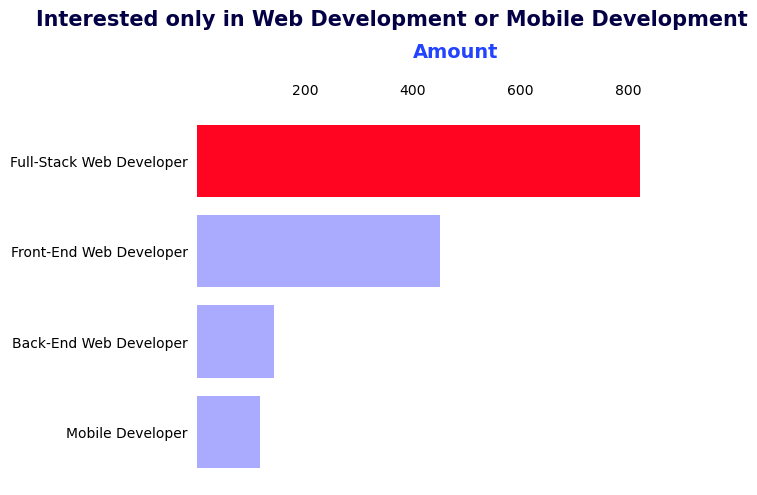

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax =plt.subplots(figsize=(6,5),dpi=100)
ax.text(x=-300,y=4.5,s='Interested only in Web Development or Mobile Development',weight='bold',size=15,color="#040045")
ax.text(x=400,y=4.15,s='Amount',weight='bold',size=14,color="#2244ff")
ax.set(xlabel=None,ylabel=None)
ax.barh(only_web_and_mobile_developer["Subjects"][::-1],only_web_and_mobile_developer["Absolute_Frequency"][::-1],
        color = ["#aaaaff","#aaaaff","#aaaaff","#ff0522"])
ax.set_xticks([200,400,600,800])
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False,left=False)
plt.show()

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. One indicator of a good market is the number of potencial customers. To make sure that we're working with a representative sample, let's drop all the rows where participant didn't answer what role they are interested in.

In [12]:
df2 = df[~df["JobRoleInterest"].isnull()]

Now let's generate a frequency table for the `CountryLive` variable:

In [13]:
df2["CountryLive"].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Liberia                        1
Papua New Guinea               1
Guadeloupe                     1
Gibraltar                      1
Gambia                         1
Name: CountryLive, Length: 137, dtype: int64

In [14]:
d2 = {}
d2["Countries"] = [i for i in dict(df2["CountryLive"].value_counts(normalize = True)*100).keys()]
d2["Absolute_Frequency"] = [i for i in dict(df2["CountryLive"].value_counts()).values()]
d2["Relative_Frequency"] = [i for i in dict(df2["CountryLive"].value_counts(normalize = True)).values()]

In [15]:
df_country = pd.DataFrame(d2)
df_country

,Countries,Absolute_Frequency,Relative_Frequency
0,United States of America,3125,0.457005
1,India,528,0.077216
2,United Kingdom,315,0.046066
3,Canada,260,0.038023
4,Poland,131,0.019158
...,...,...,...
132,Liberia,1,0.000146
133,Papua New Guinea,1,0.000146
134,Guadeloupe,1,0.000146
135,Gibraltar,1,0.000146


We can see that the developers are from 137 different countries and the two more representatives markets there are in United States of America and India. But we need to go more in depth with our analysis before taking a decision. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: US, India, United Kingdom and Canada. Some of the reason for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads. 

In [16]:
df3 = df.loc[df["CountryLive"].isin(["United States of America",
                                   "India",
                                   "United Kingdom",
                                   "Canada"])]

Some students answered that they had been leanrning to code for 0 months. To avoid dividing by 0, let's replace all the null values by 1.

In [17]:
df3_copy = df3.copy()
df3_copy["MonthsProgramming"] = df3_copy["MonthsProgramming"].replace(0,1)

In [18]:
df3_copy["MoneyPerMonth"] = df3_copy["MoneyForLearning"]/df3_copy["MonthsProgramming"]

In [19]:
df3_copy["MoneyPerMonth"].isnull().sum()

596

In [20]:
df3_copy[df3_copy["MoneyPerMonth"]== 0].MoneyPerMonth.count()

3629

There are 596 missing values in the new column and 3629 null values, so let's remove this rows.

In [21]:
df3_copy.dropna(axis = 0, subset=["MoneyPerMonth"],inplace = True)
free_index = df3_copy[df3_copy["MoneyPerMonth"] == 0].index
df3_copy.drop(labels = free_index, axis = 0, inplace = True)

Group the reamining data by the "CountryLive" column and find out how much money a student spends on average each month.

In [22]:
df3_copy.loc[:,["CountryLive","MoneyPerMonth"]].groupby("CountryLive").mean().sort_values("MoneyPerMonth",ascending = False)

,MoneyPerMonth
CountryLive,
United States of America,359.101106
Canada,225.923707
India,154.426783
United Kingdom,106.078845


The results for the United Kingdom are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics, we'd intuitively expect people in the UK to spend more on learning than people in India.

It might be that we don't have enough representative data for the United Kingdom and India, or we have some outliers making the mean too big for India, or too low for the UK. Or it might be that the results are correct.

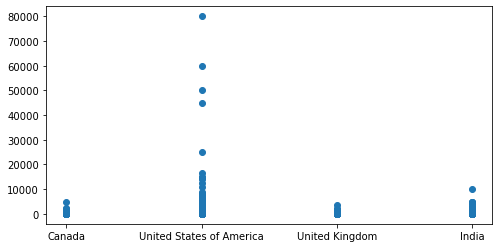

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(df3_copy["CountryLive"],df3_copy["MoneyPerMonth"])
plt.show()

There are an outlier in one of Indian values, it's near of $10000 dollars and there are some values in United States than also alter the statistics, maybe there are true but it's not too close of the others.

In [24]:
df3_copy["CountryLive"].value_counts()

United States of America    3143
India                        526
United Kingdom               367
Canada                       303
Name: CountryLive, dtype: int64

In [25]:
outlier = df3_copy[(df3_copy["MoneyPerMonth"] > 9500)].index
df3_copy.drop(outlier,inplace=True)

In [26]:
df3_copy.loc[:,["CountryLive","MoneyPerMonth"]].groupby("CountryLive").mean()

,MoneyPerMonth
CountryLive,
Canada,225.923707
India,135.673310
United Kingdom,106.078845
United States of America,245.977252


Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month. We need to choose one more market though.

To choose the second market to advertise in we'll drop the rows where `MoneyPerMonth` are less than $50 per month

In [27]:
outlier = df3_copy[(df3_copy["MoneyPerMonth"] < 50)].index
df3_copy.drop(outlier,inplace=True)

In [35]:
df3_copy.loc[:,["CountryLive","MoneyPerMonth"]].groupby("CountryLive").mean()

,MoneyPerMonth
CountryLive,
Canada,561.885310
India,449.372877
United Kingdom,323.555680
United States of America,555.616136


Now we can see that the mean it's not a right tool to take this important decision because we already drop the members that usually pay less than $50 dollars in education increasing significatively the mean. I will choose the next country according to the number of members of each country that remains in our analysis.

In [40]:
df3_copy.loc[:,["CountryLive","MoneyPerMonth"]].groupby("CountryLive").count()

,MoneyPerMonth
CountryLive,
Canada,117
India,150
United Kingdom,110
United States of America,1340


The other country to advertise is India.

# Conclusions

In this project, we analized survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in. For the second best market we choose India beacause is the other with the greater number of potencial clients.